### Data Analysis of Flipkart Laptop Reviews

This task explores and interpretes the dataset consisting of more than 24,000 real-world laptop reviews gathered from Flipkart e-commerce platform. The main objective is to analyse the data and identify the factors that influenced the good or bad review of laptop. These insights are important for the design of Decision support system in order to understand, evaluate, recommend and improve laptop products.

### Development Environment

1. Anaconda Environment : .conda
2. Python version : 3.12.9

Since the anaconda platform is integrated with Jupyter, Panda, NumPy and machine learning libraries, it is very useful for data science projects and also provides dependency management.

### Libraries

1. Pandas : For the data manipulation and cleaning
2. matplotlib, seaborn : For the data visualization
3. nltk : Natural Language Processing 
4. re : Regualr expression for the data cleaning
5. collections.counter : To evaluate frequency of words


In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data/laptops_dataset_final_600.csv')

# Display basic information of dataset
df.info()

# Shows first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


### Data Cleaning

Data Cleaning is the technique of removing the data which are corrupted, incomplete, inaccurate and not formatted correctly. Data cleaning is crucial for the data-driven analysis and deriving insights. 

In this task, we are using several methods.

1. Removes white space and converting to lower case.

In [15]:
# Removes leading and trailing spaces from column names and convert to lower case
df.columns = df.columns.str.strip().str.lower()

# Remove leading and trailing spaces from string column values
df['product_name'] = df['product_name'].str.strip()
df['title'] = df['title'].str.strip()
df['review'] = df['review'].str.strip()

2. Clean no_ratings and no_reviews columns

   This step removes commas from large numbers and convert the string type to integer

In [17]:
# For the columns no_ratings and no_reviews, ensure they are strings, remove commas from numbers, and convert to integer type
df['no_ratings'] = df['no_ratings'].astype(str).str.replace(',', '').astype(int)
df['no_reviews'] = df['no_reviews'].astype(str).str.replace(',', '').astype(int)


3. Remove non-ASCII charcters using regualr expression

In [18]:
# Import regular expression module
import re

# Removes non-ASCII characters from the 'review' and 'title' columns
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))


4. Handling missing data

In [19]:
# check if the dataset consists of null values
df.isnull().sum()


product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64

The above results shows that there are no missing values in the dataset

5. Reset the index to conitinous sequence

   After the data formatting and cleaning, row indices could be misordered. We need to reset the index back to the clean continous sequence starting from zero.

In [20]:
# Resets the index back to a continuous sequence that starts from 0
df.reset_index(drop=True, inplace=True)

In [21]:
# Save cleaned dataframe into a new CSV file
df.to_csv('Data/cleaned_laptop_reviews.csv', index=False)


In [22]:
# Shows first few rows of the dataset
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,15210,900,5,Awesome,When i ordered and came to know about seller r...


##### Different trends that can be explored and visualized from this laptop reviews dataset is provided below.

1. Rating Distribution

    The below plot shows how different ratings (from 1 to 5 stars) are spread across the dataset.

In [22]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 4.2 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.7 MB 8.4 MB/s eta 0:00:01
   ----------------------------

C:\Users\neeth\AppData\Local\Temp\ipykernel_13452\2207010907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


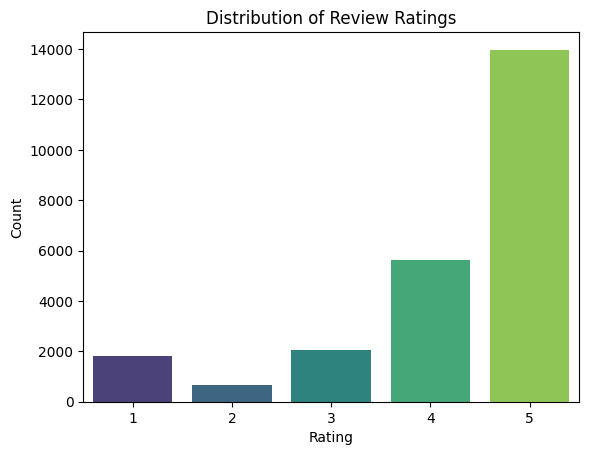

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counts how many reviews are available for each rating
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


This bar chart demonstrates the number of reviews corresponding to each rating category from 1 to 5 stars.
x-axis represents rating and the y-axis represents count of reviews. It is clear from the chart that most of the users provided 5-star ratings and it is observed that over 14000 reviews are positive. Second most common reviews are coming under 4-star reviews. 1-star and 3-star reviews are moderate and very few reviews for the 2-star rating

2. Trend between Review length and Rating

   To understand whether the length of review associated with good or bad laptop review.

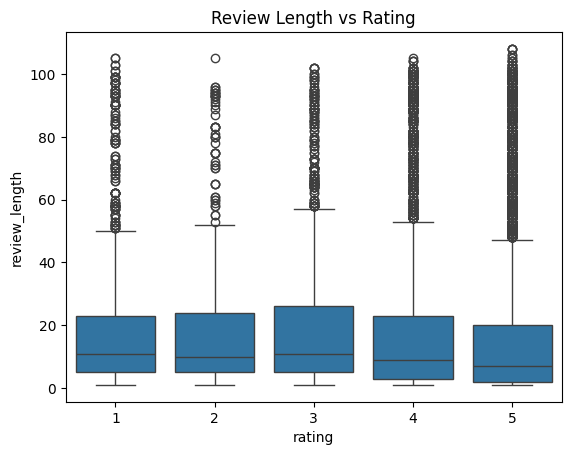

,rating,average_review_length
0,1,18.525152
1,2,18.992515
2,3,19.268305
3,4,18.674010
4,5,16.258517


In [24]:
# Calculates number of words in each review and creates a new column 'review_length' in the dataframe
# str(x).split splits the review text into words and len() calculates the count of words and store it in the column 'review_length'
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

# Visualize relationship by creating box plot
sns.boxplot(x='rating', y='review_length', data=df)
plt.title('Review Length vs Rating')
plt.show()

# Group the data by rating and calculate the average review length for each rating
avg_length_by_rating = df.groupby('rating')['review_length'].mean().reset_index()
avg_length_by_rating.columns = ['rating', 'average_review_length']
avg_length_by_rating


From the above analysis, it is clear that 1-3 star reviews are bit longer compared to 4-5 star reviews. Negative reviews may contain issues related to performance, quality, battery and heating issues leading to longer explanation. Positive reviews are very clear and concise without the elaboration. This trend is useful for the sentiment analysis modeling where review length can be used as important feature for the prediction.

3. Most Reviewd Laptop models

   To understand top 10 laptop models that received more reviews. Top laptops by the number of reviews helps to identify the popular laptop model and the brand preference.

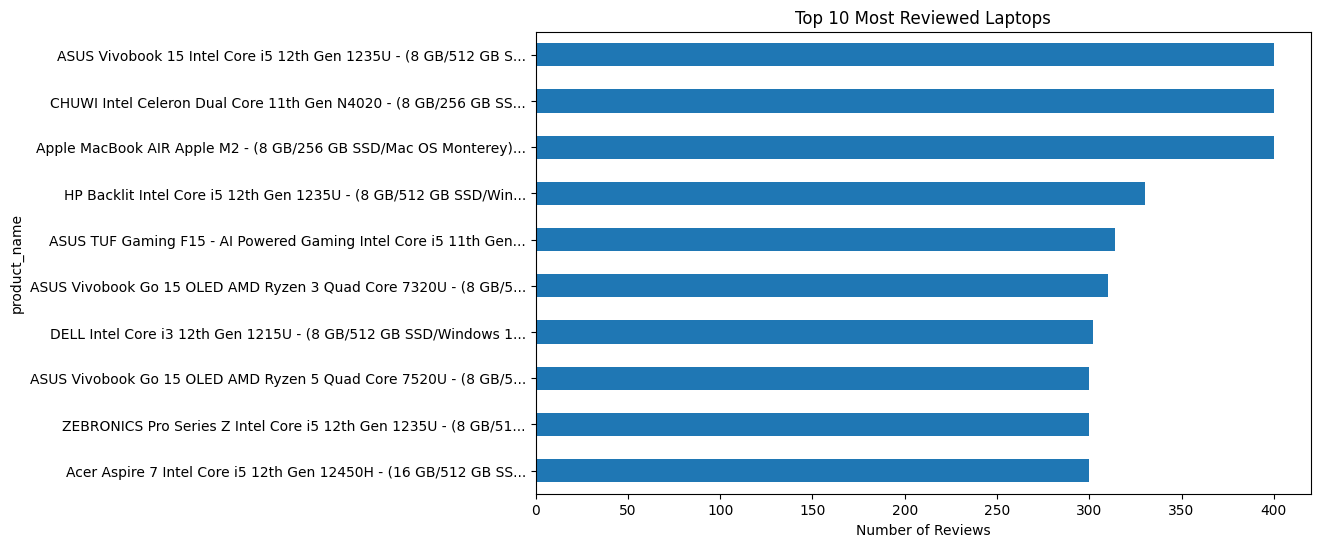

In [25]:
# count review for each laptop. value_count() counts the number of times each laptop product appears in the dataset
top_laptops = df['product_name'].value_counts().head(10)
top_laptops.plot(kind='barh', figsize=(10, 6), title='Top 10 Most Reviewed Laptops')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()
plt.show()


4. Average Rating based on product

   Shows products having highest average rating and lowest average rating

In [26]:
# Group the data by product name and calculate the average rating for each product
avg_rating = df.groupby('product_name')['rating'].mean()

# Product with the highest average rating
highest_rated_product = avg_rating.idxmax()
highest_rating = avg_rating.max()

print(f"Highest Rated Product: {highest_rated_product} with a rating of {highest_rating}")

# Product with the lowest average rating
lowest_rated_product = avg_rating.idxmin()
lowest_rating = avg_rating.min()
print(f"Lowest Rated Product: {lowest_rated_product} with a rating of {lowest_rating}")


Highest Rated Product: ASUS AMD Ryzen 5 Quad Core - (16 GB/512 GB SSD/Windows 11 Home... with a rating of 5.0
Lowest Rated Product: HP Victus Intel Core i7 12th Gen 12650H - (16 GB/1 TB SSD/Wind... with a rating of 1.0


##### What feature contibutes to good or bad laptop reviews?

In order to identify what factors governed the occurence of good or bad review, we can analyse the most frequently used words in the reviews written by users. For that, reviews needs to be split into two groups: Positive and Negative reviews. Positive reviews are the reviews that got rating of 4 and 5 stars, whereas negative reviews are those reviews that got rating of 1 and 2 stars.

Approach: Natural Language Processing is used to analyse the text. Overall steps are listed below:

1. Data Cleaning : Remove punctuation, stopwords and convert all the words to lowercase.
2. Tokenize words : Divide the sentence into words.
3. Group positive and negative reviews
3. Count word frequencies : Count how many times each words occured for postive as well as negative reviews.

In [35]:
pip install nltk

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
Using cached click-8.1.8-py3-none-any.whl (98 kB)

   -------- ------------------------------- 1/5 [regex]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ---------------- ----------------------- 2/5 [joblib]
   ------------------------ --------------- 3/5 [click]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk]
   -------------------------------- ------- 4/5 [nltk

In [27]:
# Import Counter which is the dict subclass from the module collections.
from collections import Counter

# stopwords are the words such as 'the', 'and', 'is' 
from nltk.corpus import stopwords

# Import Natural Language Toolkit
import nltk

# Download the stopwords from nltk
nltk.download('stopwords')

# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Split the text into words
    tokens = text.split()
    # Exclude stopwords and short words
    tokens = [word for word in tokens if word not in stopwords.words('english') and len(word) > 2]
    # Returns list of meaningful words after excluding stopwords and short words
    return tokens

# Group positive and negative reviews
positive_reviews = df[df['rating'] >= 4]['review'].apply(clean_text).sum()
negative_reviews = df[df['rating'] <= 2]['review'].apply(clean_text).sum()

# Get top 10 frequent words in positive reviews and negative reviews
positive_common = Counter(positive_reviews).most_common(10)
negative_common = Counter(negative_reviews).most_common(10)

print("Top words in good reviews:", positive_common)
print("Top words in bad reviews:", negative_common)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words in good reviews: [('good', 9863), ('laptop', 6583), ('product', 4693), ('battery', 3579), ('performance', 3110), ('best', 3050), ('nice', 2733), ('display', 2294), ('value', 2247), ('price', 2218)]
Top words in bad reviews: [('laptop', 821), ('battery', 602), ('product', 534), ('buy', 433), ('bad', 413), ('quality', 345), ('good', 331), ('worst', 326), ('working', 265), ('display', 264)]


#### Findings

The output clearly shows that most common words in good reviews are 'good', 'battery', 'performance', 'display', 'value' and 'price' and the most common words in bad reviews are 'battery', 'quality', 'working' and 'display'. Negative reviews are less compared to postive reviews. From the results, in general, the factors 'battery', 'display' and 'price' governed the likelihood of positive reviews.  

Similarly, we can do the keyword analysis per product to understand what factors contribute to the likelihood of a positive or negative review for a particular product. For that, identify the first three most reviewed lapotops and extract the most common keywords in both good and bad reviews. 

In [28]:
from itertools import chain

# Function to clean text and returns list of meaningful words after excluding stopwords and short words
def safe_clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        tokens = text.split()
        tokens = [word for word in tokens if word not in stopwords.words('english') and len(word) > 2]
        return tokens
    else:
        return []
    
# Get top 3 most reviewed laptop models
top_products = df['product_name'].value_counts().head(3).index.tolist()

# Define a dictionary to store keyword results
product_keywords = {}

# Itearte through each product in the top 10 most reviewed laptops
for product in top_products:
    sub_df = df[df['product_name'] == product]

    # Group good review words
    good_tokens = sub_df[sub_df['rating'] >= 4]['review'].apply(safe_clean_text).tolist()    
    # Combines list of lists into a single list
    good_flattened = list(chain.from_iterable(good_tokens))
    good_common = Counter(good_flattened).most_common(10)

    # Group bad review words
    bad_tokens = sub_df[sub_df['rating'] <= 2]['review'].apply(safe_clean_text).tolist()
    bad_flattened = list(chain.from_iterable(bad_tokens))
    bad_common = Counter(bad_flattened).most_common(10)

    # Save the result into dictionary
    product_keywords[product] = {
        'Top Words in Good Reviews': good_common,
        'Top Words in Bad Reviews': bad_common
    }

product_keywords


{'ASUS Vivobook 15 Intel Core i5 12th Gen 1235U - (8 GB/512 GB S...': {'Top Words in Good Reviews': [('good',
    140),
   ('laptop', 100),
   ('product', 88),
   ('best', 60),
   ('performance', 52),
   ('battery', 48),
   ('value', 44),
   ('nice', 44),
   ('excellent', 32),
   ('money', 32)],
  'Top Words in Bad Reviews': [('laptop', 16),
   ('like', 8),
   ('coding.i', 4),
   ('thought', 4),
   ('would', 4),
   ('good', 4),
   ('expensive', 4),
   ('nothing', 4),
   ('that,', 4),
   ('performance', 4)]},
 'CHUWI Intel Celeron Dual Core 11th Gen N4020 - (8 GB/256 GB SS...': {'Top Words in Good Reviews': [('good',
    116),
   ('nice', 64),
   ('laptop', 60),
   ('product', 60),
   ('battery', 32),
   ('best', 28),
   ('price', 28),
   ('performance', 24),
   ('chuwi', 20),
   ('quality', 20)],
  'Top Words in Bad Reviews': [('return', 24),
   ('buy', 20),
   ('quality', 20),
   ('laptop', 16),
   ('product', 16),
   ('problem', 12),
   ('bad', 12),
   ('slow', 12),
   ('worst', 12),

Abve results shows that for the model ASUS Vivobook 15 Intel Core i5 12th Gen 1235U, the factors that influenced the good reviews are performance, battery, value and money and the factors that contibuted to bad reviews are expensive and performance. 

For the model CHUWI Intel Celeron Dual Core 11th Gen N4020, the factors that influenced the good reviews are battery, price, performance and quality and the factors that contibuted to bad reviews are quality, slow performance and battery. 

For the model Apple MacBook AIR Apple M2, the factors that influenced the good reviews are battery, performance and windows and there are no significant facotrs that contibuted to bad reviews.

### Conclusion

The main objective of this project was to analyze Flipkart laptop reviews and understand the key features that contributes to the postive or negative reviews given by users. We used Data cleaning, trend analysis and natural language processing to extract the meaningful insights from over 24000 laptop reviews.

The most important observation identified was that the most frequent term that presented in the positive reviews is the "Battery" indicating that the long battery life is crucial for the customer satisfaction. Other common word included "performance", "value", "display" and "price". Negative reviews included the concerns such as "battery", "quality" and "display".

These insights are very important for developing effective Decision Support System which can identify what matters most to the customers, understand product performance in relative to the user experience, product recommendations that satisfies customer requirements, and design feature improvements. 

### References

1. McKinney, W., 2012. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. s.l.:O'Reilly Media, Inc..
2. Turban, E., 2011. Decision support and business intelligence systems. s.l.:Pearson Education India.
3. Waskom, M. L., 2021. Seaborn: statistical data visualization. Journal of Open Source Software, 6(60), p. 3021.
4. Bird, S. E. L. a. E. K., 2009. Natural Language Toolkit. [Online] 
   Available at: https://www.nltk.org/
   [Accessed 9 May 2025].
5. Distribution, A. S., 2024. Anaconda Documentation. [Online] 
   Available at: https://www.anaconda.com/docs/main
   [Accessed 8 May 2025].



